# Predicting Titanic survivors with K-nearest neighbours classification

Demonstration of K-nearest neighbours classification on the Titanic dataset. This time using the preprocessed data. For the preprocessing see the Titanic_K-nearest_neighbours_classification.ipynb notebook.


Source of data: https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the preprocessed data.

In [2]:
train = pd.read_csv('train_clear.csv')

Let's create the KNN classifier object, with the initial value of K=2.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

Splitting the dataset to train and test set.

In [4]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Fitting the training data and predicting based on the test set.

In [5]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

Evaluation

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[150  19]
 [ 80  19]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       169
           1       0.50      0.19      0.28        99

    accuracy                           0.63       268
   macro avg       0.58      0.54      0.51       268
weighted avg       0.60      0.63      0.58       268



We can see that the model made worse predictions than the random forest classifier did. Let's see if we can improve this accuracy by optimizing the K value.

In [7]:
error_rate_knn = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    error_rate_knn.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error rate')

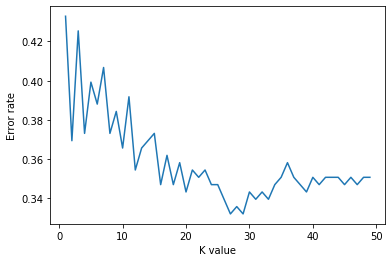

In [8]:
plt.plot(list(range(1, 50)), error_rate_knn)
plt.xlabel('K value')
plt.ylabel('Error rate')

Let's choose a new K value: K=25 then refit and revaluate the model.

In [9]:
knn_opt = KNeighborsClassifier(n_neighbors=25)
knn_opt.fit(X_train, y_train)
pred_knn_opt = knn_opt.predict(X_test)
print(confusion_matrix(y_test, pred_knn_opt))
print(classification_report(y_test, pred_knn_opt))

[[159  10]
 [ 83  16]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       169
           1       0.62      0.16      0.26        99

    accuracy                           0.65       268
   macro avg       0.64      0.55      0.51       268
weighted avg       0.64      0.65      0.58       268



With a new K value the performance slightly improved, but still did not reached the accuracy of the random forest estimator.